# Assignment 4 - Data Visualization I

Problem Statement

Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to see if we can find any patterns in the data.
Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.

In [314]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [315]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [316]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [317]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [318]:
rename_map = {}
for col in df.columns:
    rename_map.update({col : col.lower()})
    
df = df.rename(columns=rename_map)
df["age"] = df["age"].fillna(df["age"].mean())

df["cabin"] = df["cabin"].fillna("None")
df["hascabin"] = df["cabin"].ne("None")



In [319]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    
    return df[(df[col] >=lower_bound) & (df[col] <=upper_bound)]

In [320]:
df = remove_outliers(df, "age")
df = remove_outliers(df, "fare")

df.isna().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
hascabin       0
dtype: int64

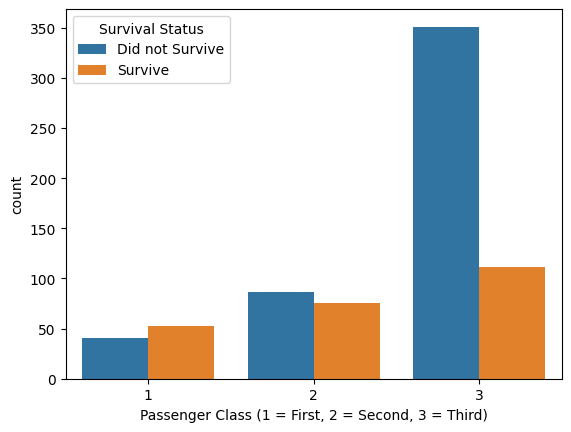

In [321]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="pclass", hue="survived")
plt.xlabel("Passenger Class (1 = First, 2 = Second, 3 = Third)")
plt.legend(title="Survival Status", labels=["Did not Survive", "Survive"])
plt.show()

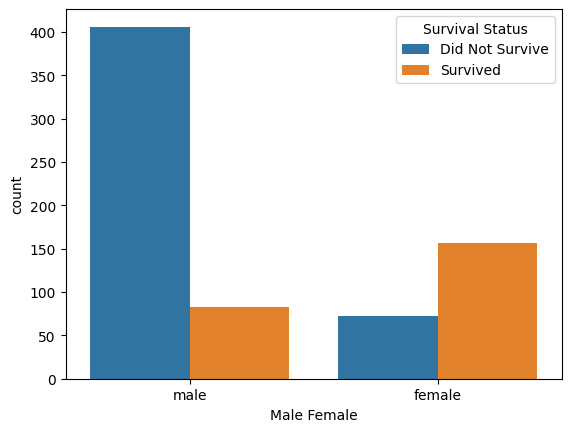

In [322]:
sns.countplot(data=df, x="sex", hue="survived")
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.xlabel("Male Female")
plt.show()

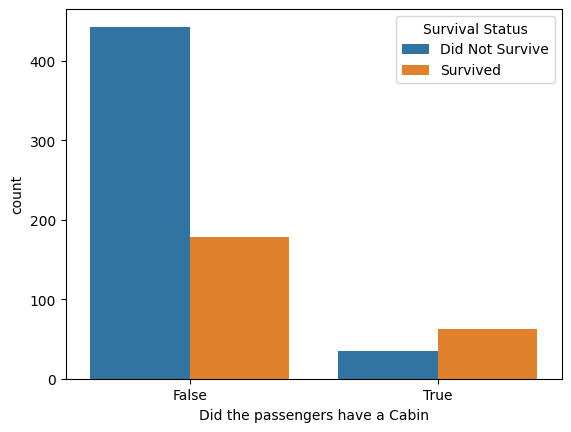

In [323]:
sns.countplot(data=df, x="hascabin", hue="survived")
plt.legend(title="Survival Status", labels=["Did Not Survive", "Survived"])
plt.xlabel("Did the passengers have a Cabin")
plt.show()


[]

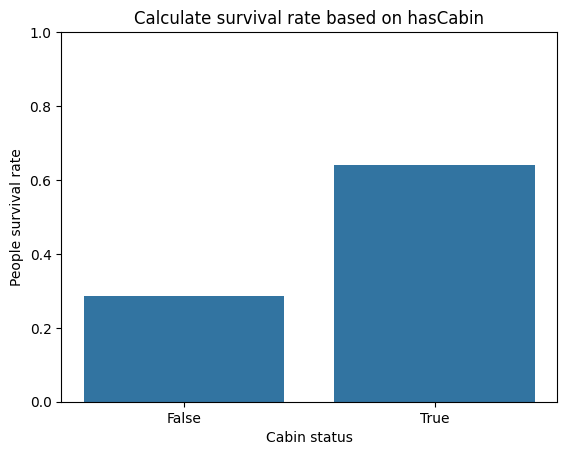

In [324]:
# Calculate survival rate based on hasCabin

cabin_group = df.groupby(by="hascabin")["survived"].mean().reset_index()

sns.barplot(data=cabin_group, x="hascabin", y="survived")
plt.ylim(0,1)
plt.title("Calculate survival rate based on hasCabin")
plt.xlabel("Cabin status")
plt.ylabel("People survival rate")
plt.plot()

[]

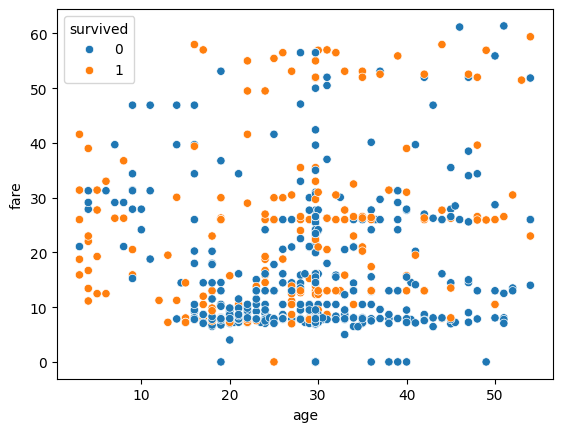

In [325]:
# Age vs Fare
sns.scatterplot(data=df, x="age", y="fare", hue="survived")
plt.plot()

<Axes: xlabel='fare', ylabel='Density'>

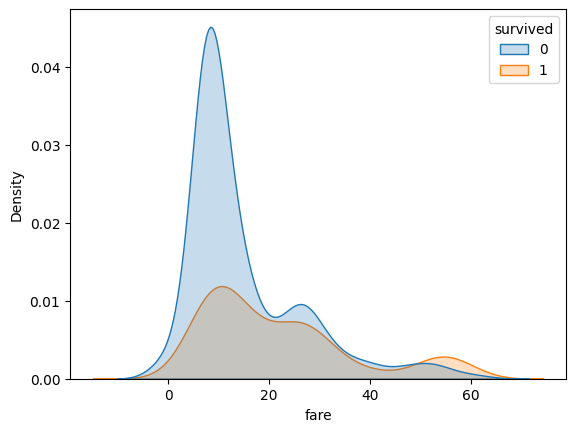

In [326]:
sns.kdeplot(data=df, x="fare",hue='survived', fill=True)

<Axes: xlabel='age', ylabel='Density'>

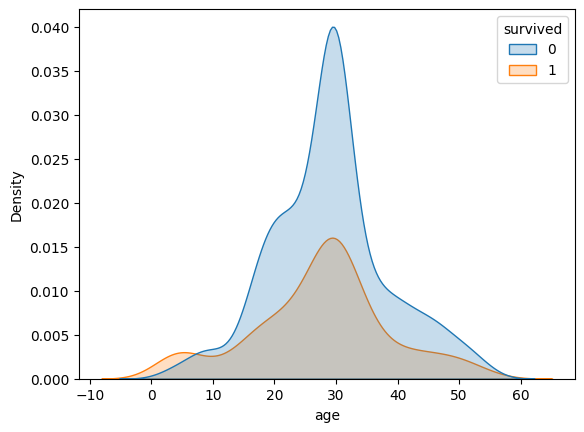

In [327]:
#  Distribution of Fare according to survival

sns.kdeplot(data=df, x="age",hue='survived', fill=True)

In [ ]:
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival Status')
plt.show()